# Training

### Read in data

March Data:

In [13]:
import pandas as pd
df_march = pd.read_csv('./dataset-march.csv')

df_march

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.547651,-121.764442,40,Friday,0
1,38.545441,-121.757456,421,Friday,1
2,38.538532,-121.750111,807,Friday,0
3,38.541948,-121.771577,1127,Friday,1
4,38.534519,-121.747342,1208,Friday,1
...,...,...,...,...,...
74,38.544424,-121.764121,1240,Friday,0
75,38.535626,-121.755768,1015,Monday,1
76,38.536763,-121.757767,695,Tuesday,0
77,38.544300,-121.757508,1182,Tuesday,0


April Data:

In [14]:
df_april = pd.read_csv('./dataset-may.csv')

df_april

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.533444,-121.754884,466,Monday,1
1,38.537745,-121.746125,564,Monday,1
2,38.540827,-121.747696,551,Monday,0
3,38.552682,-121.456162,1201,Monday,0
4,38.536821,-121.753100,534,Tuesday,1
...,...,...,...,...,...
87,38.546639,-121.764033,739,Thursday,0
88,38.571021,-121.765286,688,Wednesday,0
89,38.531302,-121.763791,1051,Thursday,1
90,38.542750,-121.759105,1086,Monday,0


May Data:

In [15]:
df_may = pd.read_csv('./dataset-may.csv')

df_may

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.533444,-121.754884,466,Monday,1
1,38.537745,-121.746125,564,Monday,1
2,38.540827,-121.747696,551,Monday,0
3,38.552682,-121.456162,1201,Monday,0
4,38.536821,-121.753100,534,Tuesday,1
...,...,...,...,...,...
87,38.546639,-121.764033,739,Thursday,0
88,38.571021,-121.765286,688,Wednesday,0
89,38.531302,-121.763791,1051,Thursday,1
90,38.542750,-121.759105,1086,Monday,0


Combine the data:

In [16]:
frames = [df_march, df_april, df_may]
  
df_raw = pd.concat(frames, ignore_index=True)
df_raw.head(10)

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.547651,-121.764442,40,Friday,0
1,38.545441,-121.757456,421,Friday,1
2,38.538532,-121.750111,807,Friday,0
3,38.541948,-121.771577,1127,Friday,1
4,38.534519,-121.747342,1208,Friday,1
5,38.554460,-121.455461,24,Friday,0
6,38.554460,-121.455461,577,Friday,0
7,38.554247,-121.452507,1097,Friday,1
8,38.554460,-121.455461,1341,Friday,0
9,38.534624,-121.758333,72,Saturday,0


### Data Preprocessing

Get rid of outliers

In [17]:
# Remove everything outside of davis ( -121.79 > Longitude, Longitude > -121.60) (Latitude > 38.59)
for index, row in df_raw.iterrows():
    if row['Latitude'] > 38.55 or row['Longitude'] > -121.60 or row['Longitude'] < -121.79:
        df_raw.drop(index, inplace=True)
df_raw.reset_index(drop=True, inplace = True)
df_raw.head(10)

,Latitude,Longitude,Time,Day of Week,Dangerous
0,38.547651,-121.764442,40,Friday,0
1,38.545441,-121.757456,421,Friday,1
2,38.538532,-121.750111,807,Friday,0
3,38.541948,-121.771577,1127,Friday,1
4,38.534519,-121.747342,1208,Friday,1
5,38.534624,-121.758333,72,Saturday,0
6,38.542637,-121.776543,1105,Saturday,1
7,38.538045,-121.770711,1334,Saturday,1
8,38.541549,-121.750473,1436,Saturday,1
9,38.540388,-121.757039,172,Sunday,1


Scaling data using minmax

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
dow_col = df_raw['Day of Week']
# Drop day of week, as it does not need to be scaled
df_nodow = df_raw.drop(['Day of Week', 'Dangerous'], axis='columns')

# Fit the scaler to your data to compute the minimum and maximum values
scaler.fit(df_nodow)

# Perform the Min-Max normalization on your data
normalized_data = scaler.transform(df_nodow)
df = pd.DataFrame(normalized_data, columns = ['Latitude','Longitude','Time'])

df['Day of Week'] = dow_col
df['Dangerous'] = df_raw['Dangerous']
df['Dangerous'].head(10)

0    0
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Dangerous, dtype: int64

One-Hot Encoding Day of Week

In [19]:
from sklearn.preprocessing import OneHotEncoder

# mapping_dictionary_value={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
ohc = OneHotEncoder()

ohe = ohc.fit_transform(df['Day of Week'].values.reshape(-1, 1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns=["DoW_" + str(ohc.categories_[0][i]) for i in range(len(ohc.categories_[0]))])

dfh = pd.concat([df, dfOneHot], axis=1)
dfh.drop("Day of Week", axis='columns', inplace=True)
dfh

,Latitude,Longitude,Time,Dangerous,DoW_Friday,DoW_Monday,DoW_Saturday,DoW_Sunday,DoW_Thursday,DoW_Tuesday,DoW_Wednesday
0,0.955792,0.419334,0.026444,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.845368,0.622706,0.291580,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.500215,0.836557,0.560195,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.670862,0.211591,0.782881,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.299758,0.917157,0.839248,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
209,0.095639,0.497434,0.445372,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210,0.905210,0.431241,0.512874,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
211,0.139028,0.438272,0.729993,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
212,0.710943,0.574713,0.754349,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Clustering

Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering
df_unsup = df.drop(["Dangerous", "Day of Week"], axis='columns')
distance_threshold = 0.2
model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='single', distance_threshold=distance_threshold)
model.fit(df_unsup)
labels = model.labels_
labels

c:\Users\patri\Documents\Code\Via\venv\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 8, 0, 0, 0, 4, 1, 0, 0, 1, 1, 1, 4, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 7, 4, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 6, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 7, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 6,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 5, 0, 0], dtype=int64)

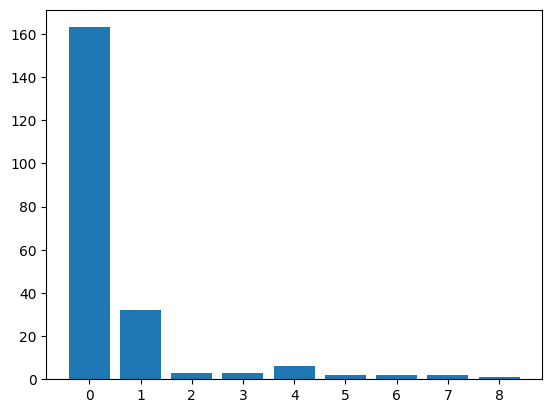

In [21]:
from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict

dic = defaultdict(int)
for n in labels:
    dic[n] += 1
od = OrderedDict(sorted(dic.items()))
plt.bar(range(len(od)), list(od.values()), align='center')
plt.xticks(range(len(od)), list(od.keys()))
plt.show()

K-means Clustering

c:\Users\patri\Documents\Code\Via\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


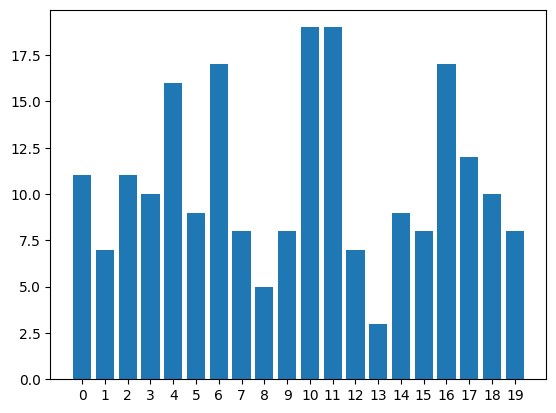

In [22]:
from sklearn import cluster

from matplotlib import pyplot as plt
from collections import defaultdict, OrderedDict

kmeans = cluster.KMeans(20)
kmeans.fit(df_nodow)
labels = kmeans.labels_

dic = defaultdict(int)
for n in labels:
    dic[n] += 1
od = OrderedDict(sorted(dic.items()))
plt.bar(range(len(od)), list(od.values()), align='center')
plt.xticks(range(len(od)), list(od.keys()))
plt.show()

### General Scatter Plots

<Axes: xlabel='Latitude', ylabel='Longitude'>

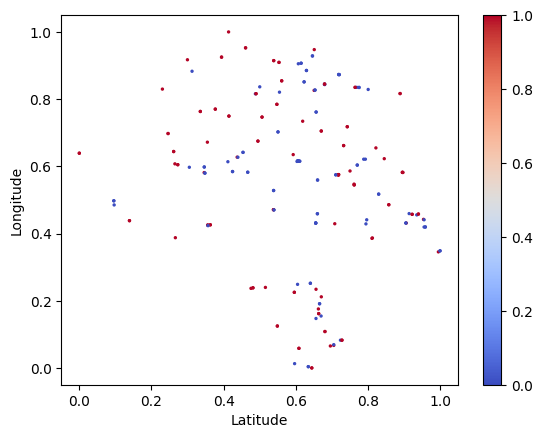

In [23]:
df.plot.scatter(x="Latitude", y="Longitude", s=2, c=df["Dangerous"], cmap='coolwarm')

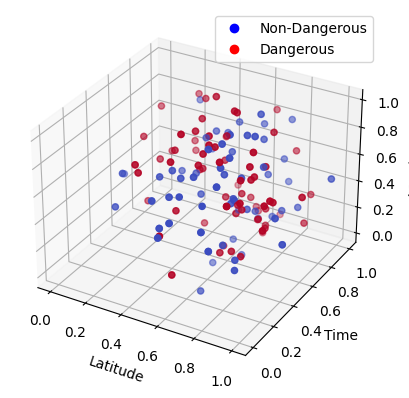

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
y = df['Time']
x = df['Latitude']
z = df['Longitude']
c = df['Dangerous']
ax.scatter(x, y, z, c=c, cmap='coolwarm')

ax.set_ylabel('Time')
ax.set_xlabel('Latitude')
ax.set_zlabel('Longitude')

import matplotlib

colors = ['blue', 'red']
scatter1_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[0], marker = 'o')
scatter2_proxy = matplotlib.lines.Line2D([0],[0], linestyle="none", c=colors[1], marker = 'o')
ax.legend([scatter1_proxy, scatter2_proxy], ['Non-Dangerous', 'Dangerous'], numpoints = 1)

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Without Day of Week
df_ndow = df.drop("Day of Week", axis='columns')
X_train, X_test, y_train, y_test = train_test_split(df_ndow.drop(['Dangerous'], axis=1), df_ndow.Dangerous, test_size=0.2, random_state=21)

# With Day of Week
# X_train, X_test, y_train, y_test = train_test_split(dfh.drop(['Dangerous'], axis=1), dfh.Dangerous, test_size=0.2, random_state=21)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
print(df_ndow.iloc[[37]])

    Latitude  Longitude      Time  Dangerous
37  0.619218   0.734217  0.533751          1


In [27]:
print(y_train)

88     0
142    1
166    0
144    1
37     1
      ..
48     0
4      1
56     0
207    1
201    1
Name: Dangerous, Length: 171, dtype: int64


In [28]:
yhat_test = logreg.predict(X_test)

In [29]:
logreg.score(X_test, y_test)

0.6046511627906976

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.60      0.32      0.41        19
           1       0.61      0.83      0.70        24

    accuracy                           0.60        43
   macro avg       0.60      0.57      0.56        43
weighted avg       0.60      0.60      0.57        43



K-nearest Neighbors

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

cv_scores = []  # To store the cross-validation scores for each K

k_values = range(1, 21)

# Iterate over K values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cv_scores.append(scores.mean())  # Store the average cross-validation score

# Print the cross-validation scores for each K
for k, score in zip(k_values, cv_scores):
    print("K =", k, "Accuracy:", score)

K = 1 Accuracy: 0.7546218487394958
K = 2 Accuracy: 0.6490756302521008
K = 3 Accuracy: 0.6374789915966387
K = 4 Accuracy: 0.6023529411764705
K = 5 Accuracy: 0.6020168067226891
K = 6 Accuracy: 0.5843697478991597
K = 7 Accuracy: 0.6018487394957982
K = 8 Accuracy: 0.6136134453781512
K = 9 Accuracy: 0.5783193277310923
K = 10 Accuracy: 0.6134453781512604
K = 11 Accuracy: 0.6191596638655462
K = 12 Accuracy: 0.6248739495798319
K = 13 Accuracy: 0.613109243697479
K = 14 Accuracy: 0.5899159663865545
K = 15 Accuracy: 0.5547899159663865
K = 16 Accuracy: 0.560672268907563
K = 17 Accuracy: 0.5959663865546219
K = 18 Accuracy: 0.5727731092436974
K = 19 Accuracy: 0.5788235294117647
K = 20 Accuracy: 0.560672268907563


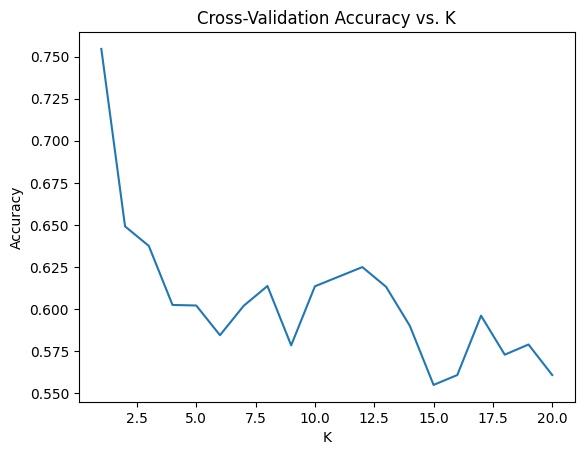

In [32]:
import matplotlib.pyplot as plt

# Plot the cross-validation scores for each K
plt.plot(k_values, cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy vs. K')
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

knn.predict_proba(X_test)

Accuracy: 0.627906976744186


array([[0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.28571429, 0.71428571],
       [0.42857143, 0.57142857],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.71428571, 0.28571429],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.28571429, 0.71428571],
       [0.71428571, 0.28571429],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.42857143, 0.57142857],
       [0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.

### Save models

In [34]:
import joblib

joblib.dump(logreg, "logreg_model")
joblib.dump(knn, "knn_model")
joblib.dump(scaler, "scaler")

['scaler']

### Code to load model

In [35]:
loaded_log_model = joblib.load("logreg_model")
result = loaded_log_model.score(X_test, y_test)
print(result)

0.6046511627906976


### Show probabilities of non-danger and danger

In [36]:
'''
Sample input: pass in as a 2D array. Can handle multiple inputs.
Here, there is only 1 input: [38.537277, -121.757298, 1252].
'''
sample_input = pd.DataFrame([[38.537277, -121.757298, 1252]], columns=["Latitude", "Longitude", "Time"])

# Load scaler
loaded_scaler = joblib.load("scaler")

# scale the sample input
sample_input_scaled = pd.DataFrame(loaded_scaler.transform(sample_input), columns = ['Latitude','Longitude','Time'])

sample_input_scaled


,Latitude,Longitude,Time
0,0.437522,0.627315,0.869868


In [37]:
loaded_log_model.predict_proba(sample_input_scaled)

array([[0.35738623, 0.64261377]])

In [38]:
loaded_knn_model = joblib.load("knn_model")
result = loaded_knn_model.score(X_test, y_test)
print(result)

0.627906976744186


In [39]:
loaded_knn_model.predict_proba(sample_input_scaled)

array([[0.57142857, 0.42857143]])